#Korean Apartment Deal Data
https://www.kaggle.com/datasets/brainer3220/korean-real-estate-transaction-data

## 1. 프로젝트 목표
- 아파트 가격에 영향을 주는 요인 파악
- 연도별 아파트 가격 추세 파악

## 2. 라이브러리 호출 및 데이터 정보

- 지역코드 : 대한민국 정부가 사용하는 지역번호의 첫 5자리 숫자이다
이 코드는 API를 호출할 때 사용되었으며, 데이터 분석에는 의미가 없을 것 같다.
- 법정동 : 대한민국 주소 체계
- 거래일
- 아파트 : 아파트명
- 지번 : 한국에서 과거에 사용하던 주소 체계이며, 현 정부에서 일반적으로 사용하지 않지만 여전히 사용되고있다.
- 전용면적 : m^2
- 층 : 거래된 층수
- 건축년도 : 건물이 지어진 연도
- 거래금액 : 아파트 거래금액 (단위:10,000원)

In [77]:
df.columns

Index(['지역', '구', '법정동', '거래일', '아파트', '전용면적', '층', '건축년도', '거래금액'], dtype='object')

In [95]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME']='yoosuhyeon'
os.environ['KAGGLE_KEY']='캐글키'

In [4]:
! rm *.* # 폴더안 모든 파일을 삭제하고 다시 파일을 받아옴
! kaggle datasets download -d brainer3220/korean-real-estate-transaction-data
! unzip '*zip'

 98% 49.0M/50.0M [00:00<00:00, 258MB/s]
100% 50.0M/50.0M [00:00<00:00, 256MB/s]
Archive:  korean-real-estate-transaction-data.zip
  inflating: Apart Deal.csv          


In [5]:
df = pd.read_csv('Apart Deal.csv')

In [6]:
df.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700


In [7]:
df.shape

(4348786, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348786 entries, 0 to 4348785
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    int64  
 1   법정동     object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    int64  
 8   거래금액    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 298.6+ MB


## 3. 데이터 정제

겹치는 법정동이 있으므로 이를 지역코드로 구분해보도록 하자. 지역코드는  https://blog.naver.com/PostView.nhn?blogId=lugenzhe&logNo=90146389643 를 참조하여 csv파일로 따로 만들었다.

In [9]:
region = pd.read_csv('/content/drive/MyDrive/캐글 개인프로젝트/지역코드.csv',encoding='cp949')
region.head()

,지역,구,지역코드
0,서울,강남구,11680
1,서울,강동구,11740
2,서울,강북구,11305
3,서울,강서구,11500
4,서울,관악구,11620


다음 df와 region을 inner join 해준다.

In [10]:
df = pd.merge(df, region, left_on='지역코드', right_on='지역코드', how='inner')

In [11]:
df

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,지역,구
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700,울산,중구
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500,울산,중구
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500,울산,중구
3,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000,울산,중구
4,31110,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700,울산,중구
...,...,...,...,...,...,...,...,...,...,...,...
4348781,30230,석봉동,2021-04-03 00:00:00,금강엑슬루타워,770,103.2750,3,2012,44700,대전,대덕구
4348782,30230,신일동,2021-04-01 00:00:00,한라,1682-4,49.8600,4,1996,9200,대전,대덕구
4348783,46910,지도읍 읍내리,2017-01-26 00:00:00,대동,299-17,84.0900,5,1992,2400,전남,신안군
4348784,46910,지도읍 읍내리,2015-04-07 00:00:00,대동,299-17,84.0900,5,1992,3000,전남,신안군


In [12]:
df.isna().sum()

지역코드      0
법정동       0
거래일       0
아파트       0
지번      418
전용면적      0
층         0
건축년도      0
거래금액      0
지역        0
구         0
dtype: int64

지번이 기재되지 않은 아파트가 있다.

In [13]:
df[df['지번'].isna()]

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,지역,구
1314206,41590,남양읍 남양리,2/5/2020 0:00,동광뷰엘,NaN,80.0082,27,2018,30700,경기,화성시
1314209,41590,남양읍 남양리,2/8/2020 0:00,동광뷰엘,NaN,80.0082,4,2018,29400,경기,화성시
1314211,41590,남양읍 남양리,2/9/2020 0:00,동광뷰엘,NaN,80.0082,20,2018,31500,경기,화성시
1314218,41590,남양읍 남양리,2/14/2020 0:00,동광뷰엘,NaN,82.3822,16,2018,29500,경기,화성시
1314240,41590,남양읍 남양리,2/23/2020 0:00,동광뷰엘,NaN,80.0082,33,2018,32000,경기,화성시
...,...,...,...,...,...,...,...,...,...,...,...
3307852,11680,자곡동,2015-08-20 00:00:00,래미안포레,NaN,84.9900,8,2014,72000,서울,강남구
3308380,11680,자곡동,2015-09-23 00:00:00,래미안포레,NaN,84.9900,4,2014,69500,서울,강남구
3309057,11680,자곡동,2015-10-07 00:00:00,래미안포레,NaN,84.9900,7,2014,77500,서울,강남구
3309058,11680,자곡동,2015-10-26 00:00:00,래미안포레,NaN,84.9900,8,2014,75000,서울,강남구


건축년도가 최근에 지어진 아파트인것같다. 그래서 지번이 null인 데이터의 건축년도 최솟값을 보면

In [14]:
df[df['지번'].isna()]['건축년도'].min()

2014

조사해보니 도로명주소가 2014년 1월 1일 전면시행되었다고 한다. 따라서 지번 columns는 drop해주도록 하자.

In [15]:
df = df.drop('지번',axis=1)

또한 거래일 날짜형식을 맞춰주도록 하자.

In [16]:
df['거래일'] = pd.to_datetime(df['거래일'])

In [17]:
df['층'].value_counts()

5     316199
4     314912
3     306886
2     295374
1     269784
       ...  
81         1
52         1
40         1
47         1
           1
Name: 층, Length: 139, dtype: int64

층을 봤더니 공백이 있다. 이건 무슨 데이턴지 한번 알아보자.

In [18]:
df[df['층']==' ']

,지역코드,법정동,거래일,아파트,전용면적,층,건축년도,거래금액,지역,구
328713,41135,수내동,2016-05-31,양지마을(5단지)(한양515-529),84.9,,1992,60000,경기,성남시 분당구


이렇게 층이 공백인 데이터가 있다. 삭제해주도록 하자. 또한 층과 거래금액을 각각 정수, 실수형태로 바꿔주자. 거래금액은 ','를 공백으로 바꿔주고 실수형태로 바꿔줘야 에러가 나지않는다.

In [19]:
drop_index_층 = df[df['층']==' '].index
df.drop(drop_index_층,axis=0,inplace=True)

In [20]:
df['거래금액'].replace(',', '', regex=True,inplace=True)

In [21]:
df = df.astype({'층': 'int','거래금액':'float'})

In [22]:
df.head()

,지역코드,법정동,거래일,아파트,전용면적,층,건축년도,거래금액,지역,구
0,31110,학성동,2020-05-30,남운학성타운,135.5800,8,1991,26700.0,울산,중구
1,31110,남외동,2020-01-03,남외푸르지오1차,101.6000,2,2006,35500.0,울산,중구
2,31110,남외동,2020-01-03,에일린의뜰,84.9920,11,2007,36500.0,울산,중구
3,31110,남외동,2020-01-03,남외푸르지오1차,118.7060,8,2006,43000.0,울산,중구
4,31110,남외동,2020-01-04,남외푸르지오2차,84.9636,7,2007,38700.0,울산,중구


columns 순서를 보기 편하게 조금 바꿔주도록 하자. 또한 지역코드는 모두 사용해줬으니 drop해준다.

In [23]:
df = df.reindex(columns=['지역', '구', '법정동', '거래일', '아파트', '전용면적','층','건축년도','거래금액'])
df.head()

,지역,구,법정동,거래일,아파트,전용면적,층,건축년도,거래금액
0,울산,중구,학성동,2020-05-30,남운학성타운,135.5800,8,1991,26700.0
1,울산,중구,남외동,2020-01-03,남외푸르지오1차,101.6000,2,2006,35500.0
2,울산,중구,남외동,2020-01-03,에일린의뜰,84.9920,11,2007,36500.0
3,울산,중구,남외동,2020-01-03,남외푸르지오1차,118.7060,8,2006,43000.0
4,울산,중구,남외동,2020-01-04,남외푸르지오2차,84.9636,7,2007,38700.0


데이터셋은 다 완료됐으니 전체적인 수치값을 한번 보도록 하자.

In [24]:
pd.set_option('float_format', '{:.5f}'.format)

In [25]:
df.describe()

,전용면적,층,건축년도,거래금액
count,4348785.00000,4348785.00000,4348785.00000,4348785.00000
mean,76.02820,9.10991,2001.34871,30795.03892
std,26.31645,6.27336,9.25789,27623.79479
min,9.26000,-4.00000,1961.00000,100.00000
25%,59.74030,4.00000,1995.00000,15000.00000
50%,79.50000,8.00000,2001.00000,24250.00000
75%,84.96000,13.00000,2008.00000,37600.00000
max,424.32000,83.00000,2022.00000,1200000.00000


그런데 이상한 점이 있다. 층을 보면 음수인 층이 있다. 데이터를 한번 보도록 하자.

In [26]:
df[df['층']<0]

,지역,구,법정동,거래일,아파트,전용면적,층,건축년도,거래금액
68,울산,중구,북정동,2020-01-03,동양,30.64000,-1,1978,13500.00000
6643,울산,중구,북정동,2019-07-16,북정,61.22000,-1,1979,17000.00000
8183,울산,중구,북정동,2020-01-03,동양,30.64000,-1,1978,13500.00000
607567,경기,안산시 상록구,수암동,2017-06-30,동신,48.66000,-1,1979,5400.00000
608127,경기,안산시 상록구,수암동,2017-09-10,동신,48.69000,-1,1979,4800.00000
...,...,...,...,...,...,...,...,...,...
4151968,광주,북구,용봉동,2015-01-22,현대3,128.65000,-1,1999,18700.00000
4271757,대전,서구,갈마동,2016-08-29,동건빌리지,44.19000,-1,1997,3700.00000
4274527,대전,서구,갈마동,2016-11-30,동건빌리지,44.19000,-1,1997,3900.00000
4278424,대전,서구,갈마동,2016-08-29,동건빌리지,44.19000,-1,1997,3700.00000


https://youtu.be/9zDAWhXITms 이 영상을 참고하면 된다. 요약하면 지하가 아니라 테라스 하우스라고 한다. 그래서 음수로 표기하나보다.

## 4. 가설 수립 및 검증

### 1. 지역에 따라 거래금액이 달라질까?

#### 1) 지역별 거래금액 barplot

In [27]:
df_지역별거래금액_mean = df.groupby('지역')[['거래금액']].mean()
df_지역별거래금액_max = df.groupby('지역')[['거래금액']].max()
df_지역별거래금액_min = df.groupby('지역')[['거래금액']].min()
df_지역별거래금액_median = df.groupby('지역')[['거래금액']].median()

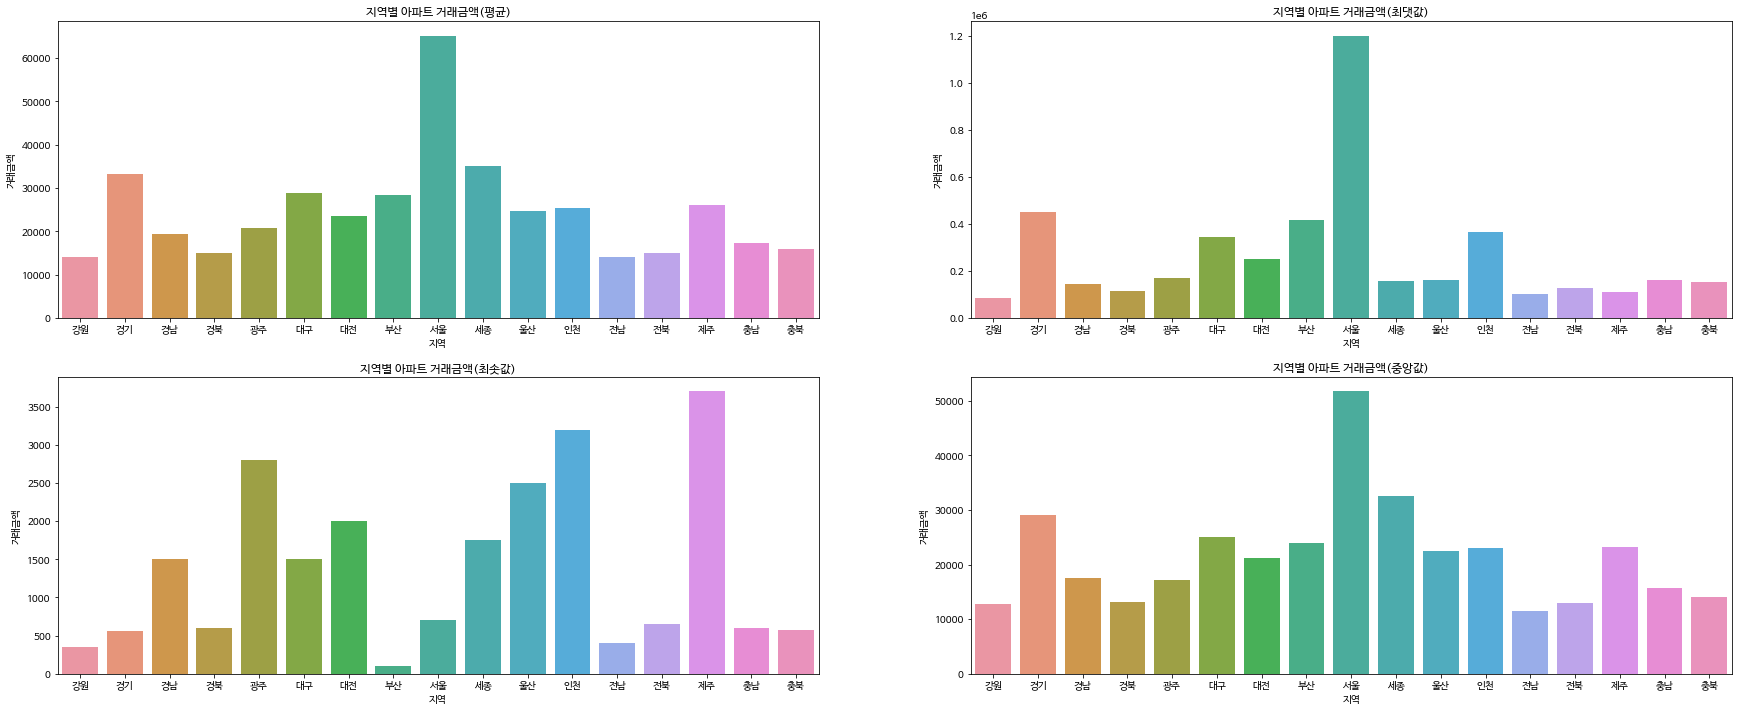

In [28]:
feature = [df_지역별거래금액_mean,df_지역별거래금액_max,df_지역별거래금액_min,df_지역별거래금액_median]
featur_title = ['지역별 아파트 거래금액(평균)','지역별 아파트 거래금액(최댓값)','지역별 아파트 거래금액(최솟값)','지역별 아파트 거래금액(중앙값)']
plt.figure(figsize=(30,12))

for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.title(featur_title[i])
    sns.barplot(x=feature[i].index,y=feature[i]['거래금액'],data=feature[i])
plt.show()

- 지역별 아파트 거래금액 평균, 중앙값, 최댓값의 경우 서울이 가장 거래금액이 높음
- 최솟값의 경우는 부산이 가장 낮고 제주가 가장 높음

### 2) 지역별 거래금액 boxplot

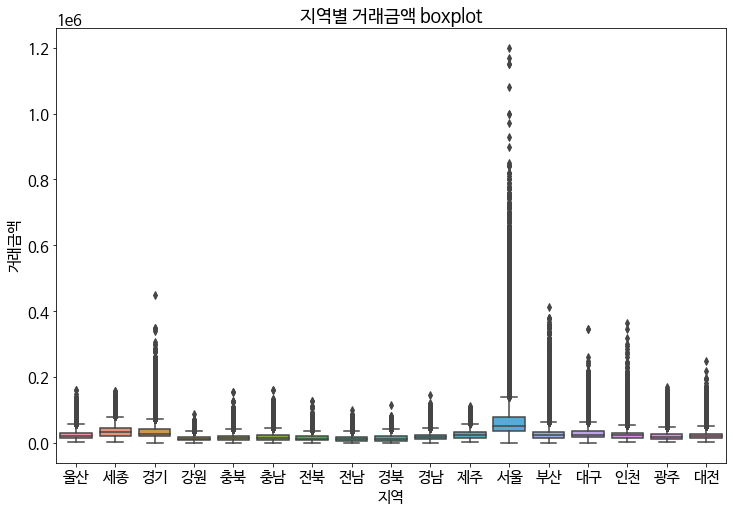

In [ ]:
plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 15
p = sns.boxplot(x='지역', y='거래금액', data=df)
p.set_title('지역별 거래금액 boxplot')
plt.show()

- 서울의 거래금액 편차, 범위가 가장 크다는 것을 볼 수 있다.

### 2. 거래일에 따라서 거래금액이 달라질까?

##### - 전국

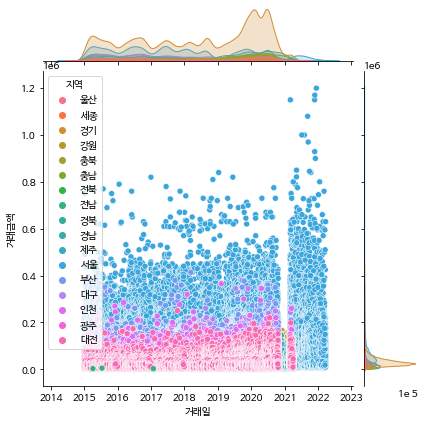

In [ ]:
sns.jointplot(x='거래일',y='거래금액',data=df,hue='지역')
plt.show()

- 서울의 경우 데이터가 많기 때문에 파란색이 가장 많이 보인다. 또한 서울의 경우 최근으로 올수록 타지역에 비해 거래금액이 높게 뛰는 데이터가 있는 것을 볼 수 있다.
- 또한 서울의 경우 최근으로 올수록 타지역에 비해 거래금액이 높게 뛰는 데이터가 있는 것을 볼 수 있다.
- 이 자료만 봐서 보편적으로 거래일이 최근일수록 거래금액이 높아지는 것은 아니라고 할 수 있다. 다양한 아파트가 있는 데이터셋이기 때문에 이 jointplot만 보고는 판단할 수 없다.

##### - 광역/특별시

In [78]:
df_re = df[(df['지역']=='부산')|(df['지역']=='서울')|(df['지역']=='울산')|(df['지역']=='제주')|(df['지역']=='대구')|(df['지역']=='인천')|(df['지역']=='광주')|(df['지역']=='대전')]

<Figure size 2160x864 with 0 Axes>

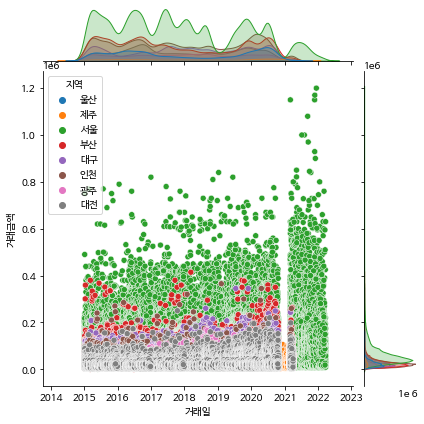

In [80]:
plt.figure(figsize=(30,12))
plt.rcParams["font.size"] = 10
sns.jointplot(x='거래일',y='거래금액',data=df_re,hue='지역')
plt.show()

### 3. 광역/특별시 feature 상관관계 비교

In [30]:
df_busan = df[df['지역']=='부산']
df_seoul = df[df['지역']=='서울']
df_ulsan = df[df['지역']=='울산']
df_jeju = df[df['지역']=='제주']
df_daegu = df[df['지역']=='대구']
df_incheon = df[df['지역']=='인천']
df_gwangju = df[df['지역']=='광주']
df_daejeon = df[df['지역']=='대전']

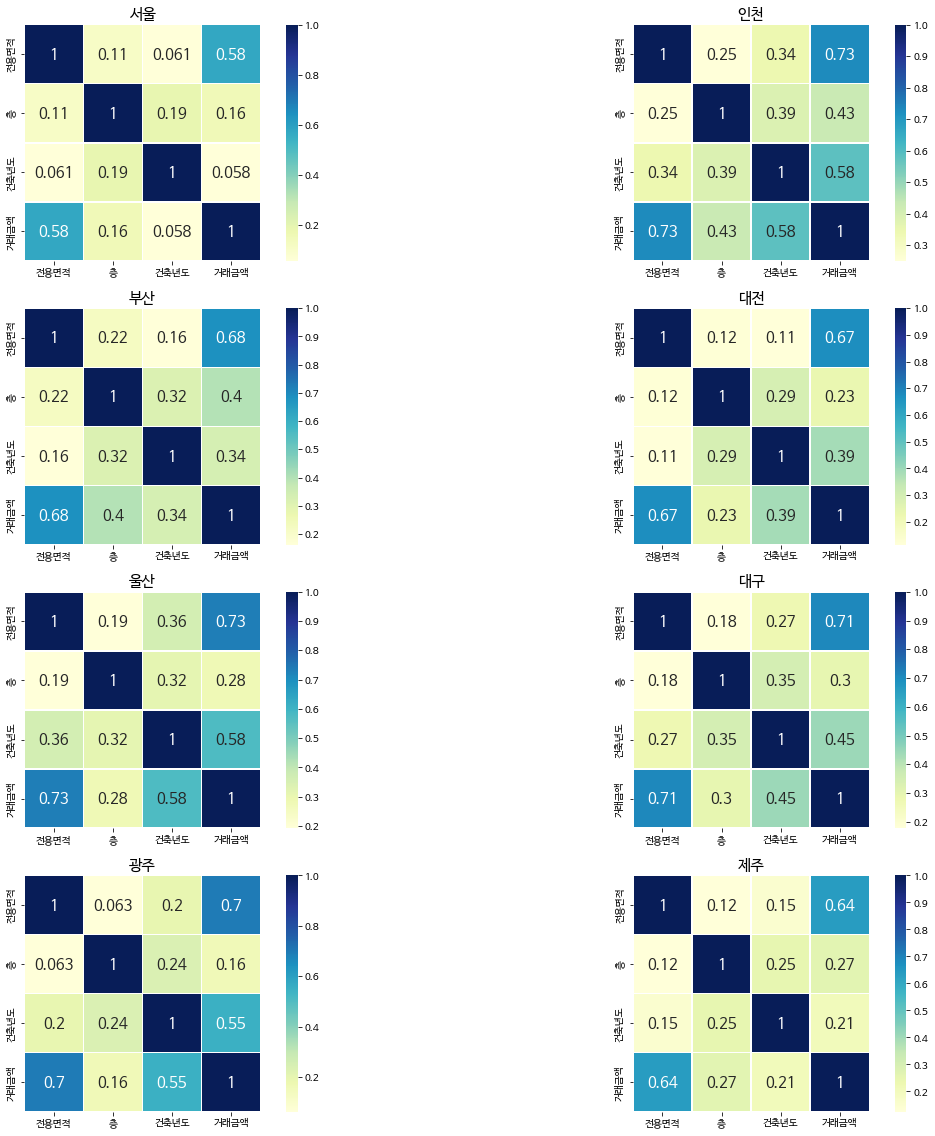

In [33]:
feature = [df_seoul,df_incheon,df_busan,df_daejeon, df_ulsan,df_daegu, df_gwangju,df_jeju]
featur_title = ['서울','인천','부산','대전','울산','대구','광주','제주']
plt.figure(figsize=(20,20))

for i in range(len(feature)):
    plt.subplot(4,2,i+1)
    plt.title(featur_title[i],size=15)
    sns.heatmap(feature[i].corr(),annot=True,cmap='YlGnBu',linewidths=0.5,annot_kws={"size": 15},square = True)
plt.show()

- 서울의 경우는 타지역에 비해 건축년도와 거래금액의 상관관계가 크지 않다.
- 서울과 제주, 특히 서울의 경우는 타지역에 비해 거래금액과 전용면적의 상관관계가 크지 않은 편이다.

### 4. 서울과 부산의 구별 거래금액 비교

#### 1) 서울의 구별 거래금액

In [37]:
df_seoul_gu = df_seoul.groupby('구')[['거래금액']].mean()
df_seoul_gu

,거래금액
구,
강남구,134304.25694
강동구,61414.40378
강북구,42480.90415
강서구,50350.20303
관악구,46246.40704
광진구,74944.12265
구로구,43067.42697
금천구,38095.01585
노원구,38290.43670


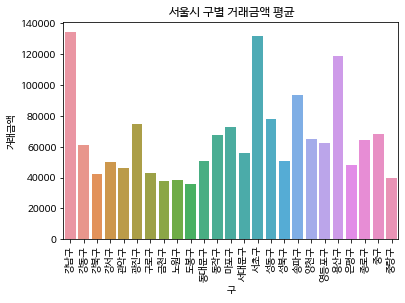

In [39]:
sns.barplot(x=df_seoul_gu.index,y=df_seoul_gu['거래금액'],data=df_seoul_gu)
plt.title('서울시 구별 거래금액 평균')
plt.xticks(rotation=90)
plt.show()

- 아파트 거래금액 평균은 강남구, 서초구, 용산구 순으로 높다.

##### 강남구 동별 거래금액 평균

In [42]:
df_seoul_gangnam = df[df['구']=='강남구']
df_seoul_gangnam_mean = df_seoul_gangnam.groupby('법정동')[['거래금액']].mean()
df_seoul_gangnam_mean

,거래금액
법정동,
개포동,111829.78828
논현동,96364.55388
대치동,163299.56922
도곡동,150266.77081
삼성동,144016.83750
세곡동,87919.42353
수서동,86506.56820
신사동,102441.25683
압구정동,234743.00000


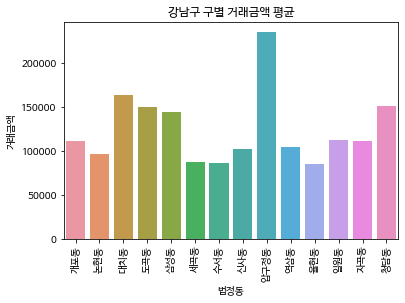

In [43]:
sns.barplot(x=df_seoul_gangnam_mean.index,y=df_seoul_gangnam_mean['거래금액'],data=df_seoul_gangnam_mean)
plt.title('강남구 구별 거래금액 평균')
plt.xticks(rotation=90)
plt.show()

- 논현동, 청담동이 가장 높을 줄 알았는데 압구정동이 거래금액이 압도적으로 높다

#### 2) 부산의 구별 거래금액

In [44]:
df_busan_gu = df_busan.groupby('구')[['거래금액']].mean()
df_busan_gu

,거래금액
구,
강서구,32513.42066
금정구,30193.95855
기장군,22615.92905
남구,32790.26749
동구,21807.21717
동래구,31646.53479
부산진구,23055.45176
북구,23758.38578
사상구,18270.71022


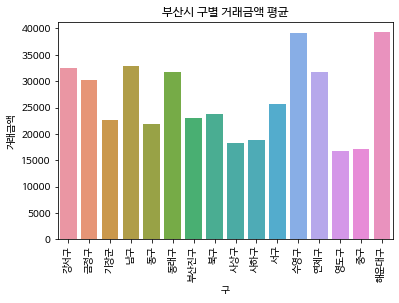

In [45]:
sns.barplot(x=df_busan_gu.index,y=df_busan_gu['거래금액'],data=df_busan_gu)
plt.title('부산시 구별 거래금액 평균')
plt.xticks(rotation=90)
plt.show()

- 해운대구, 수영구, 남구 순서대로 거래금액 평균이 높다.
- 부산거주인으로서 첨언하자면 해운대는 마린시티, 아이파크 등 집값이 비싼건 다들 알테고 수영구는 광안리가 있기 때문이 아닌가 추측해본다.

##### 해운대구 동별 거래금액 평균

In [49]:
df_busan_haeundae = df[df['구']=='해운대구']
df_busan_haeundae_mean = df_busan_haeundae.groupby('법정동')[['거래금액']].mean()
df_busan_haeundae_mean

,거래금액
법정동,
반송동,13746.03140
반여동,26178.88315
송정동,22328.23673
우동,63913.37183
재송동,32499.94708
좌동,32150.58617
중동,48479.42339


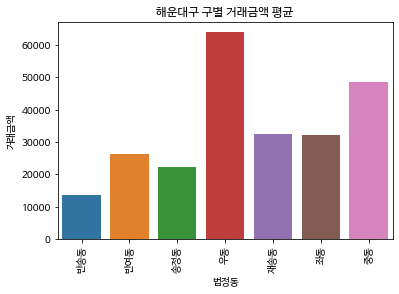

In [50]:
sns.barplot(x=df_busan_haeundae_mean.index,y=df_busan_haeundae_mean['거래금액'],data=df_busan_haeundae_mean)
plt.title('해운대구 구별 거래금액 평균')
plt.xticks(rotation=90)
plt.show()

- 우동, 중동순으로 집값이 높다. 다들 아시는 해운대 현대 아이파크는 우동에 있다. 센텀시티도 우동이다 !

## 4. 결론

- 전체적으로 서울의 집값이 압도적으로 높다.
- 특히 서울의 경우에는 건축연도와 집값이 큰 상관관계를 가지지 않는다.
- 서울 집값에 대한 부동산 정책이 필요하다는 것을 알 수 있다.